# KMeans v5
v5 uses the dataframe without key, time signature, popularity, explicit, duration_ms, speechiness, loudness

In [1]:
import functions as f
from IPython.display import IFrame
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

## Import data

In [2]:
df = pd.read_csv("data/clean_audio_features_dataset_curated.csv")

In [3]:
df = df.drop(columns=['Unnamed: 0'])
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,-6.746,...,0,0,0,0,0,0,0,0,1,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,-17.235,...,0,0,0,0,0,0,0,0,1,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,-9.734,...,0,0,0,0,0,0,0,0,1,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,-18.515,...,0,0,0,0,0,0,0,1,0,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,-9.681,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34706,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0,0.172,0.2350,-16.393,...,0,0,0,0,0,0,0,0,0,1
34707,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,0.174,0.1170,-18.318,...,0,0,0,0,0,0,0,0,1,0
34708,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,0.629,0.3290,-10.895,...,0,0,0,0,0,0,0,0,1,0
34709,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,0,0.587,0.5060,-10.889,...,0,1,0,0,0,0,0,0,1,0


In [4]:
df_model = df.drop(columns=['track_id', 'artists', 'album_name', 'track_name']).copy()

In [5]:
df_model.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'key_0', 'key_1', 'key_2', 'key_3',
       'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',
       'key_11', 'time_signature_1', 'time_signature_3', 'time_signature_4',
       'time_signature_5'],
      dtype='object')

In [6]:
df_model = df_model[['danceability', 
    'energy',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo']]
df_model

,danceability,energy,acousticness,instrumentalness,liveness,valence,tempo
0,0.676,0.4610,0.0322,0.000001,0.3580,0.7150,87.917
1,0.420,0.1660,0.9240,0.000006,0.1010,0.2670,77.489
2,0.438,0.3590,0.2100,0.000000,0.1170,0.1200,76.332
3,0.266,0.0596,0.9050,0.000071,0.1320,0.1430,181.740
4,0.618,0.4430,0.4690,0.000000,0.0829,0.1670,119.949
...,...,...,...,...,...,...,...
34706,0.172,0.2350,0.6400,0.928000,0.0863,0.0339,125.995
34707,0.174,0.1170,0.9940,0.976000,0.1050,0.0350,85.239
34708,0.629,0.3290,0.8670,0.000000,0.0839,0.7430,132.378
34709,0.587,0.5060,0.3810,0.000000,0.2700,0.4130,135.960


## Scaler

In [7]:
minmax = MinMaxScaler()

In [8]:
minmax.fit(df_model)
X_scaled = minmax.transform(df_model)

In [9]:
X_scaled

array([[0.67446924, 0.46096194, 0.03232799, ..., 0.35375048, 0.71859296,
        0.2703356 ],
       [0.39575395, 0.16594112, 0.92771074, ..., 0.09260878, 0.26834171,
        0.22138935],
       [0.41535112, 0.35895474, 0.21084229, ..., 0.10886662, 0.12060302,
        0.2159587 ],
       ...,
       [0.62329886, 0.32895262, 0.87048175, ..., 0.0752332 , 0.74673367,
        0.4790237 ],
       [0.57757213, 0.50596512, 0.38252927, ..., 0.26433231, 0.41507538,
        0.49583666],
       [0.5111595 , 0.48696378, 0.6837345 , ..., 0.08072022, 0.71155779,
        0.22941094]])

## KMeans model metrics

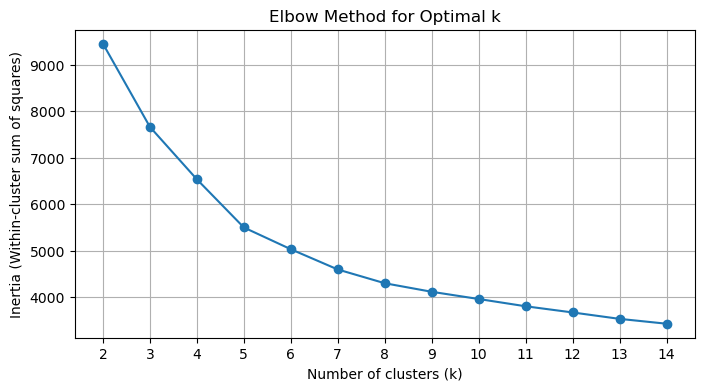

In [10]:
inertias = []
k_range = range(2, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=5)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

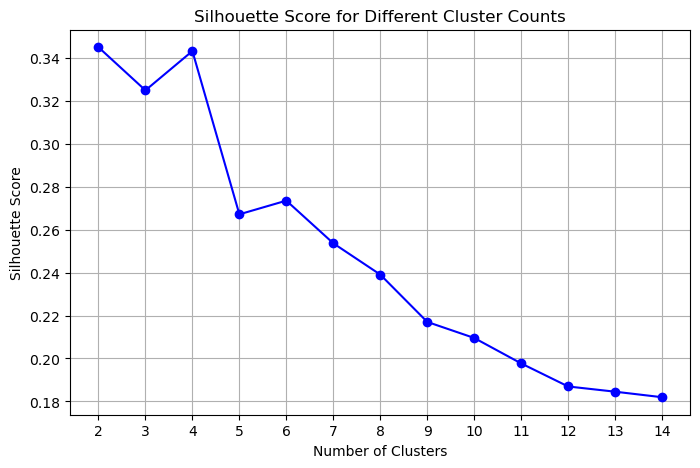

In [11]:
cluster_range = range(2, 15)
silhouette_scores = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=5)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Cluster Counts")
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

## Model training n_clusters = 6

In [12]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=5)

In [13]:
kmeans.fit(X_scaled)

KMeans(n_clusters=6, n_init=5, random_state=42)

### Model prediction

In [14]:
df_kmeans_v5_6 = pd.read_csv("data/clean_audio_features_dataset_curated.csv")
df_kmeans_v5_6 = df_kmeans_v5_6.drop(columns=['Unnamed: 0'])
df_kmeans_v5_6['cluster'] = kmeans.predict(X_scaled)

In [15]:
df_kmeans_v5_6['cluster'].value_counts()

cluster
0    10506
4     9642
3     7566
5     2735
1     2425
2     1837
Name: count, dtype: int64

### Check clusters

In [21]:
df_kmeans_v5_6[['danceability', 
    'energy',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'cluster',
    'tempo']].select_dtypes('number').groupby('cluster').mean()

,danceability,energy,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,
0,0.685240,0.743126,0.174992,0.013935,0.165655,0.742411,122.562704
1,0.436364,0.210534,0.877967,0.851898,0.143250,0.261464,107.319242
2,0.511078,0.779746,0.168436,0.019473,0.735832,0.481632,126.416775
3,0.511224,0.372896,0.725627,0.015796,0.164721,0.365323,114.707930
4,0.520238,0.736650,0.087788,0.017752,0.172475,0.345125,127.615162
5,0.623483,0.710187,0.098436,0.777479,0.176521,0.350272,124.584675


In [17]:
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

def play_random_from_cluster(dataframe, cluster_number):
    track_id = dataframe[dataframe['cluster']==cluster_number].sample()['track_id'].values[0]
    return play_song(track_id)

def play_random_5percluster(dataframe):
    for i in sorted(dataframe['cluster'].unique()):
        print(f"Songs from cluster {i}:")
        for j in range(5):
            track_id = dataframe[dataframe['cluster']==i].sample()['track_id'].values[0]
            display(play_song(track_id))

In [25]:
play_random_from_cluster(df_kmeans_v5_6, 5)

In [22]:
play_random_5percluster(df_kmeans_v5_6)

Songs from cluster 0:


Songs from cluster 1:


Songs from cluster 2:


Songs from cluster 3:


Songs from cluster 4:


Songs from cluster 5:


Clusters:
- 0: Singing in the shower
- 1: Relaxing
- 2: Little town party
- 3: In love but unsure if loved in return
- 4: Wanting to be surprised
- 5: Party Mix

In [20]:
df_kmeans_v5_6

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,...,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5,cluster
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,-6.746,...,0,0,0,0,0,0,0,1,0,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,-17.235,...,0,0,0,0,0,0,0,1,0,3
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,-9.734,...,0,0,0,0,0,0,0,1,0,4
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,-18.515,...,0,0,0,0,0,0,1,0,0,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,-9.681,...,0,0,0,0,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34706,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0,0.172,0.2350,-16.393,...,0,0,0,0,0,0,0,0,1,1
34707,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,0.174,0.1170,-18.318,...,0,0,0,0,0,0,0,1,0,1
34708,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,0.629,0.3290,-10.895,...,0,0,0,0,0,0,0,1,0,3
34709,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,0,0.587,0.5060,-10.889,...,1,0,0,0,0,0,0,1,0,4


## Save model

In [26]:
f.save(df_kmeans_v5_6)

 models/kmeans_v5_6
